# Basic Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import itertools
import random

# Method for creating meshgrid for plotting
### numpy.meshgrid(x, y, stepsize) returns x and y coordinate matrices in the form of y_steps * x_steps

In [2]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Method for creating contour plot
### numpy.ravel(x) returns a contiguous flattened array of x
#### x = np.array([[1, 2, 3], [4, 5, 6]])
#### print(np.ravel(x))
#### [1 2 3 4 5 6]

### numpy.c translates slice objects to concatenation along the second axis.
#### np.c_[np.array([1,2,3]), np.array([4,5,6])]
#### array([[1, 4],
####            [2, 5],
####            [3, 6]])

In [3]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Import IRIS data 

In [4]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
features = iris.data
y = iris.target

# Creating SVM model instance

In [5]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
model = svm.SVC(kernel='linear')

# Fit IRIS data to SVM model and plot support vectors
## Plot is done wrt 2 features

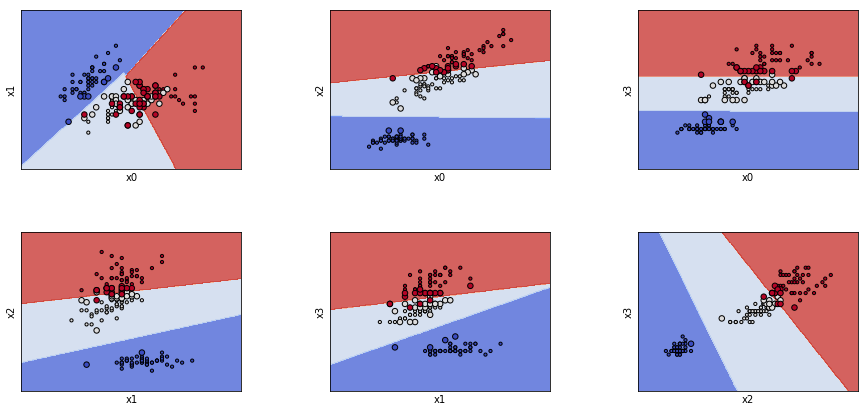

In [6]:
# Set-up 2x3 grid for plotting.
fig, sub = plt.subplots(2, 3, figsize=(15,7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#plt.rcParams.update({'font.size': 22})

feat_idx=[0,1,2,3]
pairs_of_features = list(itertools.combinations(feat_idx, 2))

for ax, pair_of_features in zip(sub.flatten(), pairs_of_features):
    X = features[:, [pair_of_features[0],pair_of_features[1]]]
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    clf = model.fit(X, y)
    sv = clf.support_vectors_
    svi = clf.support_
    sv0, sv1 = sv[:, 0], sv[:,1]
    y_of_sv = []
    for i in svi:
        y_of_sv.append(y[i])
    
    y_of_sv = np.array(y_of_sv)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=10, edgecolors='k')
    ax.scatter(sv0, sv1, c=y_of_sv, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x'+str(pair_of_features[0]))
    ax.set_ylabel('x'+str(pair_of_features[1]))
    ax.set_xticks(())
    ax.set_yticks(())
    
plt.show()

# Generating 2D data from Uniform Distribution ~ U(-1,1) x U(-1,1)

In [7]:
np.random.seed(random.randint(1,100))

X = np.random.uniform(-1,1,(200,2))
#y = np.random.randint(0,3,250)
y=[]
for i in range(X.shape[0]):
    y.append(np.sign(X[i][0]**2 + X[i][1]**2 - 0.5))
    

# Split dataset into training set and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test
model = svm.SVC(C = 1e1, gamma='auto')
clf = model.fit(X_train,y_train)
acc = clf.score(X_test,y_test)
acc

0.9666666666666667

# Training and test accuracy with varying C

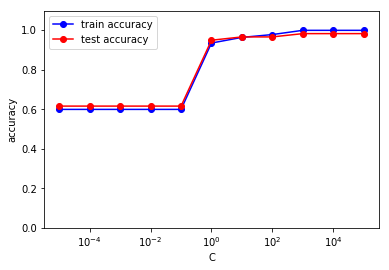

In [9]:
C1=1e-5
C_arr=[]
while C1 <= 1e5:
    C_arr.append(C1)
    C1 = C1 * 10
C_arr=np.array(C_arr)
train_acc_arr, test_acc_arr = [], []
for C1 in C_arr:
    #print(C1)
    model = svm.SVC(C = C1, gamma='auto')
    clf = model.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    #print(test_acc)
    train_acc_arr.append(train_acc)
    test_acc_arr.append(test_acc)
    
train_acc_arr=np.array(train_acc_arr)
test_acc_arr=np.array(test_acc_arr)

# Plotting training and test accuracy wrt. C

fig, ax = plt.subplots()

ax.plot(C_arr, train_acc_arr, 'bo-', label='train accuracy')
ax.plot(C_arr, test_acc_arr, 'ro-', label='test accuracy')
ax.set_xlabel('C')
ax.set_ylabel('accuracy')
ax.set_xticks(C_arr)
ax.set_xscale('log')
plt.legend()
ax.set_ylim([0,1.1])

plt.show()

# Defining custom kernel
## K(x,y) = (XY' +1)^degree

In [10]:
def poly_custom(degree):
    
    def my_kernel(X, Y):
        retval = (np.dot(X,Y.T)+1)**degree
        return retval
    
    return my_kernel


# Implementing custom kernel as well as built-in kernel

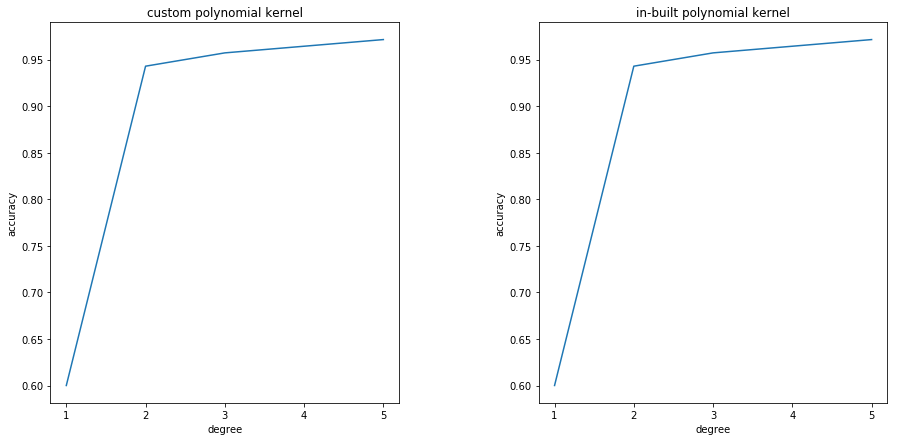

In [11]:
# Set-up 1*2 grid for plotting.
fig, sub = plt.subplots(1, 2, figsize=(15,7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
ax=sub.flatten()

acc=[]
degree_arr=[]
for degree in range(1,6):
    clf = svm.SVC(kernel = poly_custom(degree))
    clf.fit(X_train, y_train)
    degree_arr.append(degree)
    acc.append(clf.score(X_train, y_train))
acc=np.array(acc)
degree_arr=np.array(degree_arr)
ax[0].plot(degree_arr,acc)
ax[0].set_xticks(degree_arr)
ax[0].set_xlabel('degree')
ax[0].set_ylabel('accuracy')
ax[0].set_title('custom polynomial kernel')

acc=[]
degree_arr=[]
for degree in range(1,6):
    clf=svm.SVC(kernel='poly', degree = degree, gamma=1, coef0=1)
    clf.fit(X_train,y_train)
    degree_arr.append(degree)
    acc.append(clf.score(X_train, y_train))
acc=np.array(acc)
degree_arr=np.array(degree_arr)
ax[1].plot(degree_arr,acc)
ax[1].set_xticks(degree_arr)
ax[1].set_xlabel('degree')
ax[1].set_ylabel('accuracy')
ax[1].set_title('in-built polynomial kernel')

plt.show()